In [1]:
#import sys
#!{sys.executable} -m pip install matplotlib.pyplot


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from tqdm import tqdm
from astropy.visualization.hist import hist as fancyhist


import pandas
pandas.set_option('display.max_columns', None)


import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [8 , 8]

In [33]:
def Plot(x_data, y_data, x_label='', y_label='', xbins=20, hist2d_nbins=200, x_min=None, x_max=None, y_min=None, y_max=None, xlog=True, ylog=True):
    plt.rcParams['figure.figsize'] = [16 , 8]
    fig, axes = plt.subplots(1, 2)
    
    if x_min==None: x_min = np.min(x_data)
    if x_max==None: x_max = np.max(x_data)
    if y_min==None: y_min = np.min(y_data)
    if y_max==None: y_max = np.max(y_data)


    # First Plot
    ax = axes[0]
    ax.set_title(f'Means of {int(xbins)} log-spaced bins')
    bin_edges = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=xbins+1)
    statistics = np.zeros(shape=(int(xbins), 5))
    
    for i in range(int(xbins)):
        mask_bin = ((x_data>=bin_edges[i]) & (x_data<bin_edges[i+1]))
        x_temp = np.array(x_data[mask_bin])
        y_temp = np.array(y_data[mask_bin])
        N_temp = int(len(x_temp))
        statistics[i] = np.array([N_temp, 
                                  np.mean(x_temp), 
                                  np.std(x_temp, ddof=1)/np.sqrt(N_temp), 
                                  np.mean(y_temp), 
                                  np.std(y_temp, ddof=1)/np.sqrt(N_temp)])

    ax.errorbar(x=statistics[:,1], 
                y=statistics[:,3], 
                xerr=statistics[:,2], 
                yerr=statistics[:,4], 
                fmt='.', color='blue', ecolor='grey', capsize=4, capthick=1)
    
    x_min_bins = np.min(statistics[:,1])
    x_max_bins = np.max(statistics[:,1])
    y_min_bins = np.min(statistics[:,3])
    y_max_bins = np.max(statistics[:,3])
    
    if xlog==True: 
        ax.set_xscale('log')
        ax.set_xlim(0.5*x_min_bins, 1.5*x_max_bins)
    else: 
        ax.set_xlim(0.99*x_min_bins, 1.01*x_max_bins)
        
    if ylog==True: 
        ax.set_yscale('log')
        ax.set_ylim(0.5*y_min_bins, 1.5*y_max_bins)
    else:
        ax.set_ylim(0.95*y_min_bins, 1.05*y_max_bins)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


    # Second Plot
    ax = axes[1]
    ax.set_title(f'2-D histogram of the data')
    binx = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=hist2d_nbins)
    biny = np.logspace(start=np.log10(y_min), stop=np.log10(y_max), num=hist2d_nbins)
    hist = ax.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
    
    if xlog==True: ax.set_xscale('log')
    if ylog==True: ax.set_yscale('log')
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    cax = fig.add_axes([0.91, 0.11, 0.02, 0.77])
    fig.colorbar(hist[3], cax=cax)
    
    
    #plt.show()
    
    return fig, axes, statistics, hist

## Analyze the input data

In [2]:
data = Table.read('SDSS_LAB2024_photometry.fits', format='fits')
data = data.to_pandas()
data

,id,ra,dec,redshift,sdss.up,sdss.up_err,sdss.gp,sdss.gp_err,sdss.rp,sdss.rp_err,sdss.ip,sdss.ip_err,sdss.zp,sdss.zp_err
0,1237657873254907919,140.153626,39.308208,0.028312,0.119670,0.020435,1.029917,0.012816,1.621148,0.022931,1.954847,0.023217,2.286192,0.059580
1,1237657873254973544,140.325684,39.456471,0.056195,0.091612,0.006626,0.247744,0.003121,0.358206,0.004741,0.453588,0.007278,0.492240,0.025029
2,1237654880726286453,190.287293,5.309674,0.074970,0.045000,0.004752,0.214703,0.004054,0.462379,0.007594,0.667785,0.011125,0.835854,0.022765
3,1237654880727728243,193.587524,5.282654,0.048760,0.466016,0.013479,1.720028,0.006990,2.967451,0.009481,4.098367,0.018062,4.911618,0.059197
4,1237654880728842356,196.179871,5.124015,0.054671,0.147323,0.008597,0.379945,0.003792,0.529207,0.006502,0.663836,0.009359,0.737546,0.032889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92478,1237654881812545849,219.128952,5.382636,0.029722,0.130263,0.007935,0.621287,0.008810,1.230597,0.015837,1.698397,0.020601,2.189831,0.033350
92479,1237654881814511891,223.538071,5.049211,0.028227,0.050782,0.006481,0.183128,0.002653,0.343451,0.003437,0.469283,0.005994,0.610483,0.021694
92480,1237651823782396044,214.389114,5.217847,0.079587,0.126914,0.013361,0.634937,0.021585,1.301933,0.033164,1.929476,0.038042,2.559679,0.063614
92481,1237651823782985830,215.724396,5.183447,0.056425,0.101443,0.014067,0.449638,0.008164,0.778556,0.010234,0.989564,0.016335,1.230477,0.053690


## Analyze the output data

In [3]:
results = Table.read('./out_full/results.fits', format='fits')
results = results.to_pandas()
results

,id,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.sdss.gp,bayes.sdss.gp_err,bayes.sdss.ip,bayes.sdss.ip_err,bayes.sdss.rp,bayes.sdss.rp_err,bayes.sdss.up,bayes.sdss.up_err,bayes.sdss.zp,bayes.sdss.zp_err,best.chi_square,best.reduced_chi_square,best.attenuation.B_B90,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.FUV,best.attenuation.V_B90,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.nebular.ne,best.nebular.zgas,best.sfh.age,best.sfh.burst_age,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.sdss.up,best.sdss.gp,best.sdss.rp,best.sdss.ip,best.sdss.zp
0,1237657873254907919,0.024257,0.148864,0.034852,0.180222,0.024923,0.150864,0.813277,0.064224,1.966500,0.049148,1.459651,0.023274,0.161777,0.016154,2.532923,0.126091,7.830311,1.957578,1.331683,0.264,0.60,0.264,0.60,0.264,0.60,2.621240,1.072804,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,647.0,20.0,0.0,0.1,46.5,600.703624,1.0,0.02,10.0,13368.111980,3.803276e+24,0.028312,5.055656e+32,1.299495e+31,1.112661e+33,2.733061e+31,2.468935e+36,2.327126e+32,2.470826e+36,5.658388e+09,1.114690e-04,3.891712e-04,1.230300e-04,5.279591e+36,3.974634e+33,3.919185e+33,5.544877e+31,5.279295e+36,2.953351e+32,2.062985e+09,2.062985e+09,7.630566e+01,3.595402e+09,3.595401e+09,1.153994e+03,7.954457e+50,7.786732e+50,1.677245e+49,0.163447,0.855873,1.471915,1.969252,2.509335
1,1237657873254973544,1.703986,1.943519,2.361601,3.351815,1.720523,1.963627,0.242112,0.012637,0.443666,0.014797,0.344725,0.011248,0.093262,0.009139,0.522656,0.030554,0.118907,0.029727,0.249372,0.044,0.10,0.044,0.10,0.044,0.10,0.737715,0.193441,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1500.0,20.0,0.0,0.1,541.0,1042.152363,1.0,0.02,10.0,13003.015620,7.708407e+24,0.056195,1.829330e+32,2.316632e+34,4.615793e+32,5.564139e+34,4.149507e+35,4.743766e+35,9.687794e+35,3.278326e+09,4.043335e-01,4.437052e-01,4.077165e-01,3.973401e+36,1.988034e+35,3.698753e+33,1.951046e+35,2.966458e+36,1.006943e+36,1.277028e+09,1.276785e+09,2.426724e+05,2.001298e+09,1.997463e+09,3.834491e+06,5.996591e+52,8.757685e+50,5.909014e+52,0.091143,0.253507,0.362687,0.441209,0.500566
2,1237654880726286453,0.912346,1.924841,0.939005,1.961911,0.914507,1.927816,0.207874,0.011325,0.654413,0.019171,0.456883,0.019417,0.044528,0.005430,0.878735,0.046464,0.082754,0.020689,0.770858,0.154,0.35,0.154,0.35,0.154,0.35,1.555298,0.623578,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1500.0,20.0,0.0,0.1,46.5,1453.856923,1.0,0.02,10.0,12764.994344,1.042477e+25,0.074970,1.652499e+33,4.475367e+23,3.824081e+33,9.634630e+23,2.570888e+36,8.364153e+24,2.576364e+36,1.980224e+10,4.211531e-12,1.470370e-11,4.648328e-12,9.388564e+36,1.550025e+34,1.550025e+34,2.094970e+

In [14]:
def sSFR (age, epsilon, tdyn):
    epsilon_primed = epsilon / tdyn
    return epsilon_primed * np.exp(-epsilon_primed* (age) )/ (1- np.exp(-epsilon_primed* (age) ))

In [91]:
#define our variables
epsilon = 0.02 #from Kennicut
tdyn = 2*10**7 #also from Kennicut

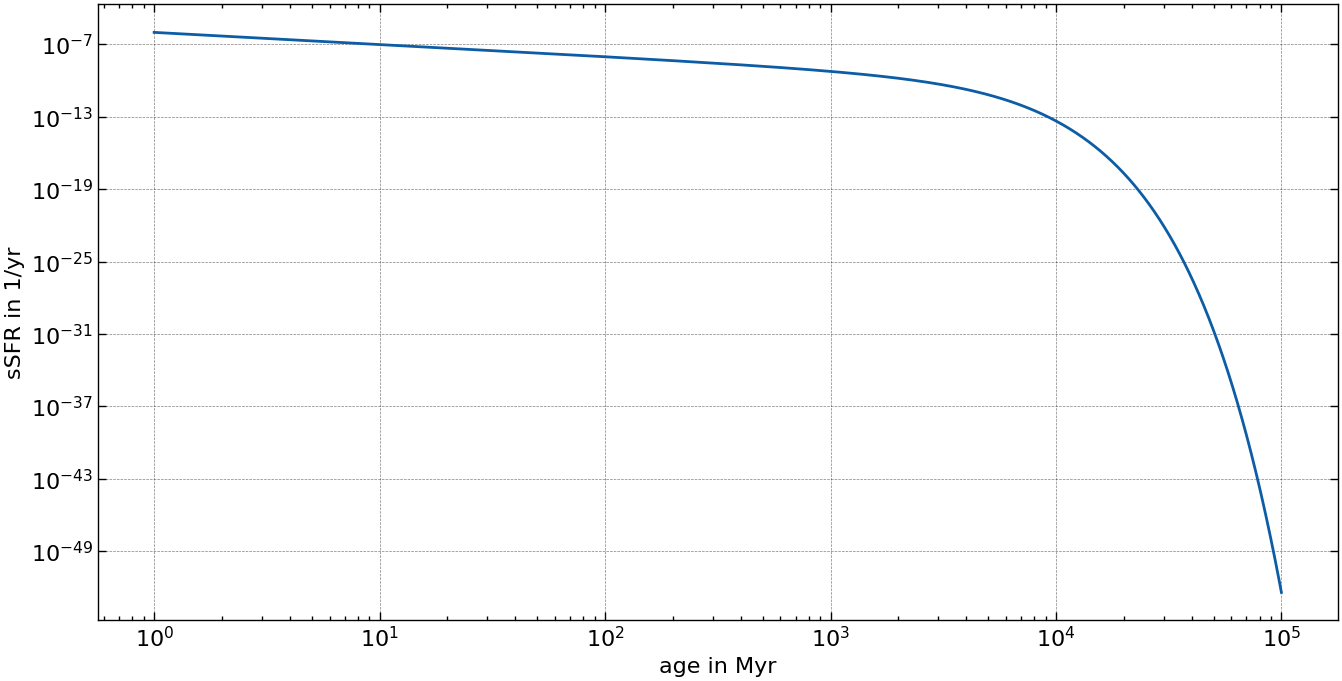

In [92]:
age = np.linspace(10**0, 10**5, 1000) # in Myr
sSFR_points = sSFR(age*10**6, epsilon, tdyn) #in 1/years !!!!!
plt.plot(age, sSFR_points)

plt.xlabel("age in Myr")
plt.ylabel("sSFR in 1/yr")
plt.xscale('log')
plt.yscale('log')

bins occupation = [  215    47    51   165   380   846  1053  1350   915  1123  2640  8471
 16953 19122 13951  6830  5102  4731  7800   738]


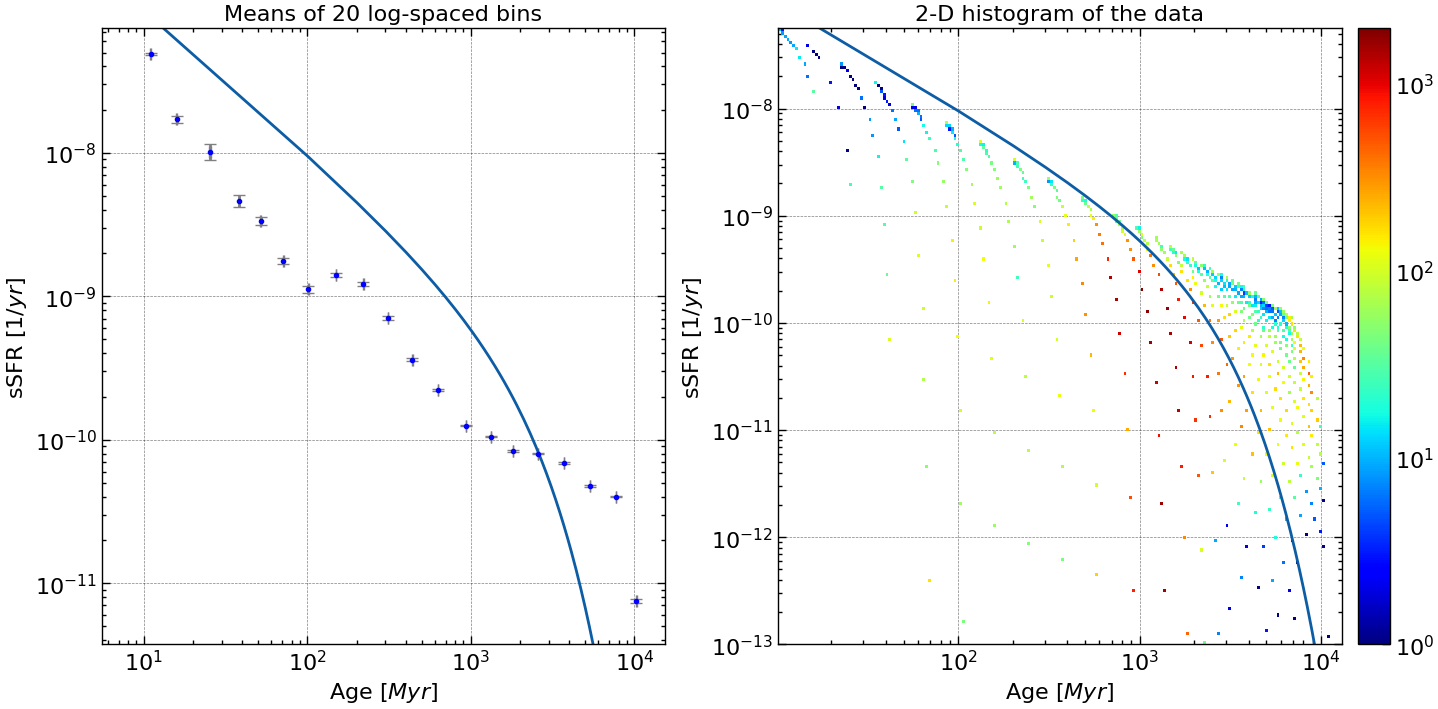

In [95]:
x_data = results['best.stellar.age_m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', xbins=20, hist2d_nbins=200, y_min=1e-13);
print(f'bins occupation = {statistics[:,0].astype(int)}')
ax[0].plot(age, sSFR_points)
ax[1].plot(age, sSFR_points)

plt.show()



abbiamo galasse con sSFR più alto rispetto al modello (closed box)
mandenendo closed box ---> avremmo bisogno di tdyn più basso (eps' più alto) ---> quindi (tdyn prop 1 /sqrt(rho) )ho bisogno di galassie più dense!
facciamo:
-> diminuiamo tdyn e vediamo quale descrive età alte
-> se possibile calcoliamo densità galassie e vediamo se sono maggiori? (come troviamo densità? size? ----> CHIEDERE )
**size che contiene 50% della luminosità**   ---> trend con il raggio sono lineari...

senza closed ---> inflow di massa

rotational curve galassia --> rotazione in alone 
cambiare massa di fattore 10 fa cambiare velocity di radice di 10 at most
**cambiare raggio e velocità viriale(massa) cambia davvero poco per tdyn!!**

modelllo closed box---> sSFR deve scendere per forza, diffice che io trovi MS
300/400 km/s 

## we see that the galaxies that are not described by the model (keeping Kennicut's numbers) are the old and star forming ones ---> red ones in this plot

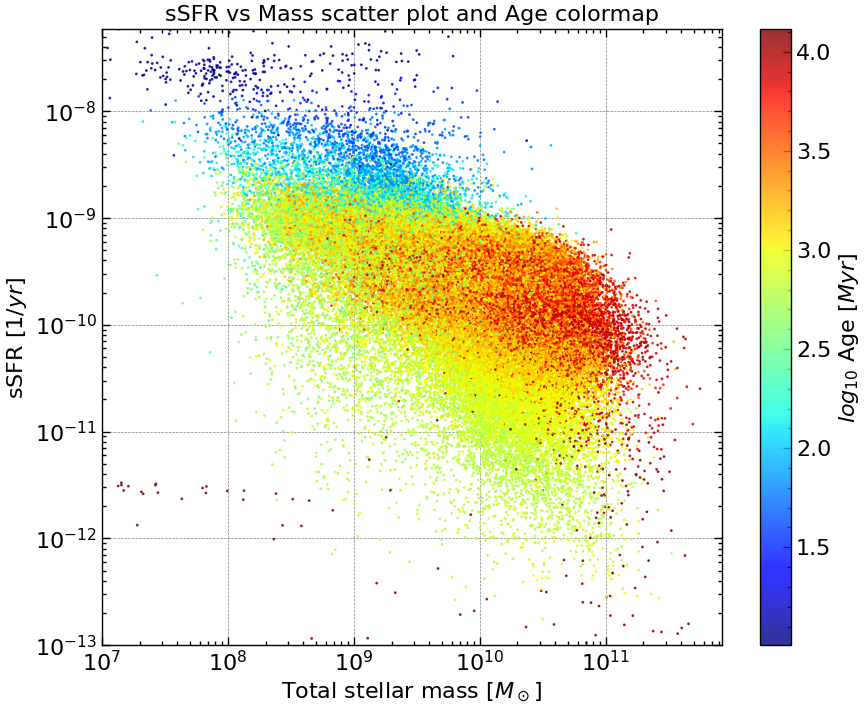

In [103]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']/results['best.stellar.m_star']
colormap_age = np.log10(results['best.stellar.age_m_star'])

plt.rcParams['figure.figsize'] = [10 , 8]

x_min = 1e7
x_max = np.max(x_data)
y_min = 1e-13
y_max = np.max(y_data)
hist2d_nbins = 200

plt.title(f'sSFR vs Mass scatter plot and Age colormap')
plt.scatter(x_data, y_data, c=colormap_age, cmap=plt.cm.jet, alpha=0.8, s=1)
plt.colorbar(label='$log_{{10}}$ Age $[Myr]$')

plt.xscale('log')
plt.yscale('log')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel('Total stellar mass $[M_\odot]$')
plt.ylabel('sSFR $[1/yr]$');

# ora: cambiamo tdyn per vedere quale possa descrivere le galassie vecchie con alto sSFR --> trovamo la rho che dovrebbero avere (dovrebbe essere ***unphysical***)

In [100]:
#define our variables
epsilon = 0.02 #from Kennicut
tdyn = np.linspace(2* 10**7,  10**8.5, 6) #in years

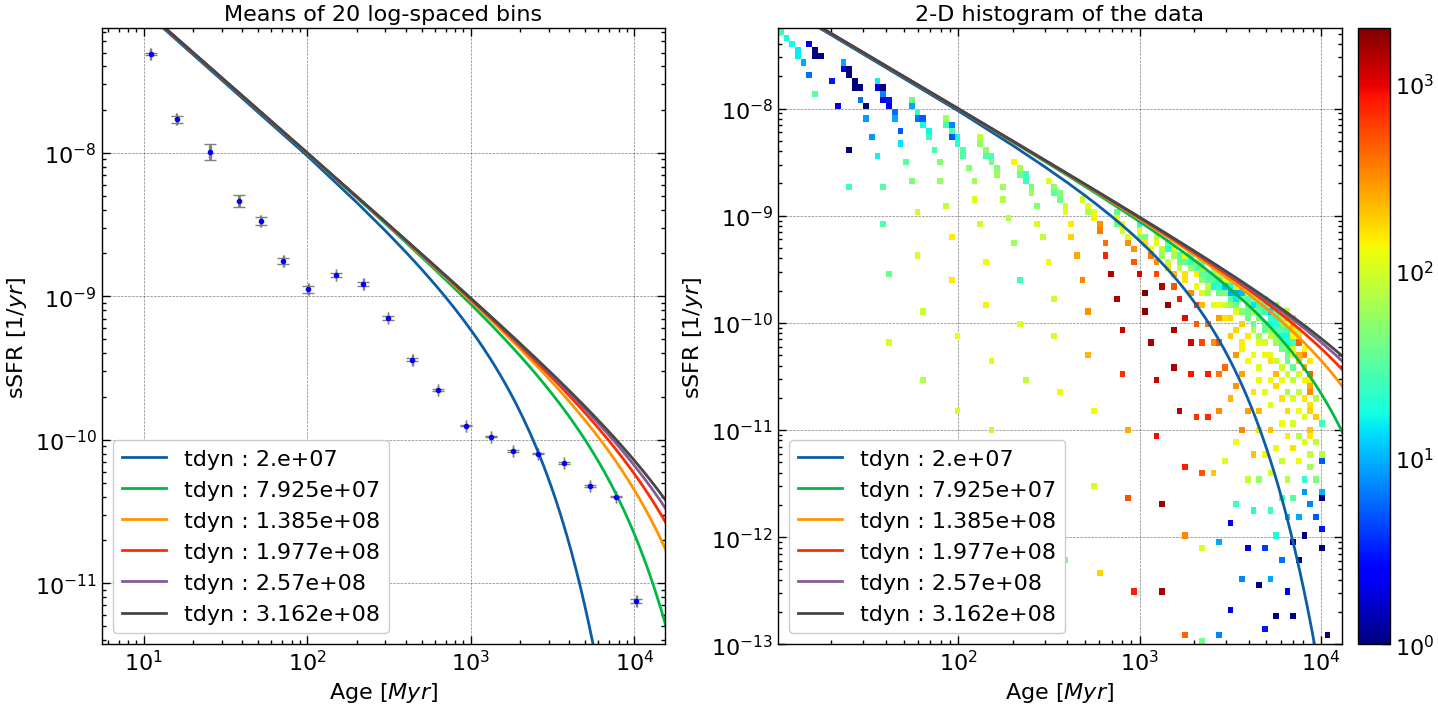

In [101]:
age = np.linspace(10**0, 10**5, 1000) # in Myr



fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', xbins=20, hist2d_nbins=100, y_min=1e-13);

for td in tdyn:
    sSFR_points = sSFR(age*10**6, epsilon, td) #in 1/years !!!!!
    ax[0].plot(age, sSFR_points, label = f"tdyn : {np.format_float_scientific(td, 3)}")
    ax[1].plot(age, sSFR_points, label = f"tdyn : {np.format_float_scientific(td, 3)}")

ax[0].legend()
ax[1].legend()


plt.show()




In [90]:
# let's see how the radius goes

R_1_2 = tdyn / (2*10**7) * 4 #kpc
print(tdyn, "\n", R_1_2)

[2.00000000e+07 7.92455532e+07 1.38491106e+08 1.97736660e+08
 2.56982213e+08 3.16227766e+08] 
 [ 4.         15.84911064 27.69822128 39.54733192 51.39644256 63.2455532 ]


### **circular velocity doesn't change that much !! 100-300 km/s -- big change is radius**


see Shen 2003 ---> "the sky distribution of galaxies in the sdss" ---> guardiamo size-mass relation ----> non ci sono galassie con raggi così grossi !! (crivere una mail a **Fossati** se bramiamo articolo preciso)

size -mass relation in sdss

# **Guardiamo class 6 per capire se usare bayes o best!!!**

# we want to see the dependency of SFR changing the initial parameters

In [ ]:
def SFR (t, t0, epsilon, tdyn, mgas0):
     epsilon_primed = epsilon / tdyn
